In [ ]:
import kagglehub
kagglehub.login()

Kaggle credentials set.
Kaggle credentials successfully validated.


# Task
Use transfer learning with PyTorch to classify brain tumors from the dataset provided in the `/data/brain_tumor_dataset` directory. Split the data into training, validation, and test sets.

## Load and explore the data

### Subtask:
Load the images from the downloaded dataset, examine the directory structure, and understand the file organization (e.g., how images are separated by tumor type).


In [ ]:
import kagglehub
import os
import torch

# Download the dataset again to ensure it's present
path = kagglehub.dataset_download("shuvokumarbasakbd/brain-tumor-mri-detection-colorized")

# Assuming the path to the dataset is stored in the 'path' variable
dataset_path = os.path.join(path, 'dataset')

print(f"Contents of the dataset directory: {dataset_path}")
for item in os.listdir(dataset_path):
    item_path = os.path.join(dataset_path, item)
    print(f"- {item_path}")
    if os.path.isdir(item_path):
        print(f"  Contents of {item_path}:")
        # List only a few items from subdirectories to avoid excessive output
        sub_items = os.listdir(item_path)
        for i, sub_item in enumerate(sub_items):
            if i < 5: # Print only the first 5 items
                print(f"  - {os.path.join(item_path, sub_item)}")
            else:
                print("  ...")
                break

Using Colab cache for faster access to the 'brain-tumor-mri-detection-colorized' dataset.
Contents of the dataset directory: /kaggle/input/brain-tumor-mri-detection-colorized/dataset
- /kaggle/input/brain-tumor-mri-detection-colorized/dataset/no
  Contents of /kaggle/input/brain-tumor-mri-detection-colorized/dataset/no:
  - /kaggle/input/brain-tumor-mri-detection-colorized/dataset/no/LUT_Color_Map
  - /kaggle/input/brain-tumor-mri-detection-colorized/dataset/no/Edge_Detection
  - /kaggle/input/brain-tumor-mri-detection-colorized/dataset/no/Interactive_Segmentation
  - /kaggle/input/brain-tumor-mri-detection-colorized/dataset/no/3D_Volume_Rendering
  - /kaggle/input/brain-tumor-mri-detection-colorized/dataset/no/Gamma_Correction
  ...
- /kaggle/input/brain-tumor-mri-detection-colorized/dataset/yes
  Contents of /kaggle/input/brain-tumor-mri-detection-colorized/dataset/yes:
  - /kaggle/input/brain-tumor-mri-detection-colorized/dataset/yes/LUT_Color_Map
  - /kaggle/input/brain-tumor-mri-d

In [ ]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split, DataLoader
import os

# 1. Define transformations
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)), # Resize for common pre-trained models like ResNet
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # ImageNet standards
])

# Assuming dataset_path is defined and points to the directory containing 'yes' and 'no'
# If dataset_path is not defined, you would need to define it here, e.g.,
# dataset_path = '/path/to/your/dataset/directory'

# 2. Create ImageFolder dataset
image_dataset = ImageFolder(root=dataset_path, transform=data_transforms)

# 3. Split dataset into training, validation, and test sets
total_size = len(image_dataset)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = total_size - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(image_dataset, [train_size, val_size, test_size])

# 4. Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 5. Print the number of samples and batches
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of validation samples: {len(val_dataset)}")
print(f"Number of test samples: {len(test_dataset)}")
print(f"Number of training batches: {len(train_loader)}")
print(f"Number of validation batches: {len(val_loader)}")
print(f"Number of test batches: {len(test_loader)}")

Number of training samples: 1610
Number of validation samples: 345
Number of test samples: 346
Number of training batches: 51
Number of validation batches: 11
Number of test batches: 11


## Choose and load a pre-trained model

### Subtask:
Select a suitable pre-trained model from a popular deep learning library like `torchvision.models`.


In [ ]:
# @title
import torchvision.models as models

# Choose a pre-trained model, for example, ResNet18
model = models.resnet18(pretrained=True)

# Print the model structure
print(model)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 186MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## Modify the model for transfer learning

### Subtask:
Replace the classification head of the pre-trained model with a new one that fits the number of classes in your brain tumor dataset.


## Set up the training process

### Subtask:
Define the loss function, optimizer, and training loop.


## Train the model

### Subtask:
Train the modified model on your training dataset, monitoring performance on the validation set.


In [ ]:
import torch

# Access the final fully connected layer
num_ftrs = model.fc.in_features

# Create a new fully connected layer for 2 classes
num_classes = 2
model.fc = torch.nn.Linear(num_ftrs, num_classes)

# Print the modified model structure to confirm the change
print(model.fc)

Linear(in_features=512, out_features=2, bias=True)


# Task
Complete the provided code to train a deep learning model for image classification, including data distribution visualization, training loop, model evaluation, and visualization of training results and confusion matrix.

## Visualize data distribution

### Subtask:
Create a plot to show the distribution of images across the 'yes' and 'no' classes in the dataset.


**Reasoning**:
The subtask is to visualize the distribution of classes in the dataset. I will create a bar plot showing the counts of images in the 'yes' and 'no' classes.



**Reasoning**:
The error indicates that `image_dataset` is not defined. I need to rerun the cell where `image_dataset` was created using `ImageFolder` and then proceed with plotting the class distribution.



**Reasoning**:
The error indicates that `dataset_path` is not defined. I need to rerun the cell where the dataset was downloaded and `dataset_path` was defined, and then proceed with creating the dataset, splitting it, creating data loaders, and plotting the class distribution.



Using Colab cache for faster access to the 'brain-tumor-mri-detection-colorized' dataset.


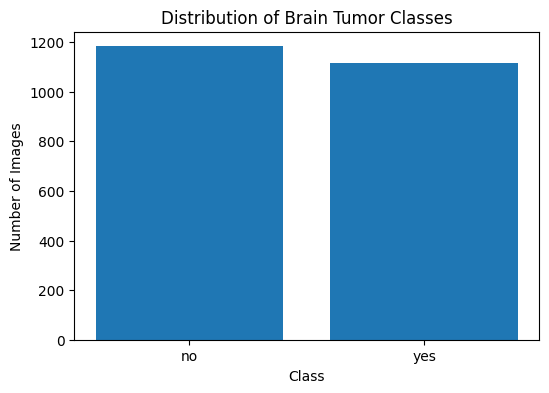

In [ ]:
import kagglehub
import os
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split, DataLoader
import matplotlib.pyplot as plt
from collections import Counter

# Download the dataset again to ensure it's present
path = kagglehub.dataset_download("shuvokumarbasakbd/brain-tumor-mri-detection-colorized")

# Assuming the path to the dataset is stored in the 'path' variable
dataset_path = os.path.join(path, 'dataset')

# 1. Define transformations
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)), # Resize for common pre-trained models like ResNet
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # ImageNet standards
])

# 2. Create ImageFolder dataset
image_dataset = ImageFolder(root=dataset_path, transform=data_transforms)

# 3. Split dataset into training, validation, and test sets
total_size = len(image_dataset)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = total_size - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(image_dataset, [train_size, val_size, test_size])

# 4. Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Get class names and counts
class_names = image_dataset.classes
class_counts = Counter(image_dataset.targets)
counts = [class_counts[i] for i in range(len(class_names))]

# Create the bar plot
plt.figure(figsize=(6, 4))
plt.bar(class_names, counts)
plt.title("Distribution of Brain Tumor Classes")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

## Set up training

### Subtask:
Define the loss function, optimizer, and move the model to the appropriate device (CPU or GPU).


**Reasoning**:
Define the loss function, optimizer, and move the model to the appropriate device.



In [ ]:
import torch
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

# Load a pre-trained model, for example, ResNet18
model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)

# Modify the classification head
num_ftrs = model.fc.in_features
num_classes = 2 # Assuming 2 classes: tumor and no tumor
model.fc = nn.Linear(num_ftrs, num_classes)

# 1. Define the loss function
criterion = nn.CrossEntropyLoss()

# 2. Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 3. Determine the available device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 4. Move the model to the selected device
model.to(device)

print(f"Model moved to: {device}")

Model moved to: cuda


## Train the model

### Subtask:
Implement the training loop, including forward passes, backward passes, and optimization steps. Track loss and accuracy for training and validation sets.


**Reasoning**:
Implement the training loop including forward and backward passes, optimization, and tracking of loss and accuracy for both training and validation sets over a specified number of epochs.



In [ ]:
# 1. Set the number of training epochs
num_epochs = 25

# 2. Initialize lists to store training and validation losses and accuracies
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# 3. Start the training loop
for epoch in range(num_epochs):
    # 4. Set the model to training mode
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    # 5. Iterate over the training data loader
    for inputs, labels in train_loader:
        # 6. Move data to the selected device
        inputs, labels = inputs.to(device), labels.to(device)

        # 9. Zero the gradients
        optimizer.zero_grad()

        # 7. Perform forward pass
        outputs = model(inputs)

        # 8. Calculate the loss
        loss = criterion(outputs, labels)

        # 9. Perform backward pass and optimization
        loss.backward()
        optimizer.step()

        # 10. Track training loss and correct predictions
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total_samples += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

    # 11. Calculate average training loss and accuracy
    epoch_train_loss = running_loss / total_samples
    epoch_train_accuracy = correct_predictions / total_samples
    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_accuracy)

    # 12. Set the model to evaluation mode and disable gradient calculation
    model.eval()
    running_val_loss = 0.0
    correct_val_predictions = 0
    total_val_samples = 0

    with torch.no_grad():
        # 13. Iterate over the validation data loader
        for inputs, labels in val_loader:
            # 14. Move data to the selected device
            inputs, labels = inputs.to(device), labels.to(device)

            # 15. Perform forward pass
            outputs = model(inputs)

            # 16. Calculate validation loss and correct predictions
            loss = criterion(outputs, labels)
            running_val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total_val_samples += labels.size(0)
            correct_val_predictions += (predicted == labels).sum().item()

    # 17. Calculate average validation loss and accuracy
    epoch_val_loss = running_val_loss / total_val_samples
    epoch_val_accuracy = correct_val_predictions / total_val_samples
    val_losses.append(epoch_val_loss)
    val_accuracies.append(epoch_val_accuracy)

    # 18. Print the results for the current epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_train_loss:.4f}, Train Accuracy: {epoch_train_accuracy:.4f}, Val Loss: {epoch_val_loss:.4f}, Val Accuracy: {epoch_val_accuracy:.4f}")


Epoch 1/25, Train Loss: 0.4260, Train Accuracy: 0.8155, Val Loss: 0.3226, Val Accuracy: 0.8551
Epoch 2/25, Train Loss: 0.1443, Train Accuracy: 0.9273, Val Loss: 0.2323, Val Accuracy: 0.8899
Epoch 3/25, Train Loss: 0.1145, Train Accuracy: 0.9472, Val Loss: 0.1240, Val Accuracy: 0.9362
Epoch 4/25, Train Loss: 0.0955, Train Accuracy: 0.9602, Val Loss: 0.0837, Val Accuracy: 0.9565
Epoch 5/25, Train Loss: 0.0924, Train Accuracy: 0.9571, Val Loss: 0.1012, Val Accuracy: 0.9507
Epoch 6/25, Train Loss: 0.0847, Train Accuracy: 0.9615, Val Loss: 0.1012, Val Accuracy: 0.9449
Epoch 7/25, Train Loss: 0.0768, Train Accuracy: 0.9634, Val Loss: 0.1464, Val Accuracy: 0.9333
Epoch 8/25, Train Loss: 0.1006, Train Accuracy: 0.9516, Val Loss: 0.1219, Val Accuracy: 0.9449
Epoch 9/25, Train Loss: 0.1083, Train Accuracy: 0.9528, Val Loss: 0.1630, Val Accuracy: 0.9275
Epoch 10/25, Train Loss: 0.0583, Train Accuracy: 0.9720, Val Loss: 0.0491, Val Accuracy: 0.9623
Epoch 11/25, Train Loss: 0.0572, Train Accuracy: 

## Evaluate the model

### Subtask:
Evaluate the trained model on the test set to calculate final accuracy and generate a confusion matrix.


**Reasoning**:
Evaluate the trained model on the test set to calculate final accuracy and generate a confusion matrix.



In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# 1. Set the model to evaluation mode
model.eval()

# 2. Initialize variables
correct_predictions = 0
total_samples = 0
all_labels = []
all_predicted = []

# 3. Iterate over the test_loader with torch.no_grad()
with torch.no_grad():
    for inputs, labels in test_loader:
        # 4. Move inputs and labels to the appropriate device
        inputs, labels = inputs.to(device), labels.to(device)

        # 5. Perform a forward pass
        outputs = model(inputs)

        # 6. Get the predicted labels
        _, predicted = torch.max(outputs.data, 1)

        # 7. Update the counts
        total_samples += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

        # 8. Append the true and predicted labels
        all_labels.extend(labels.cpu().numpy())
        all_predicted.extend(predicted.cpu().numpy())

# 9. Calculate the final test accuracy
test_accuracy = correct_predictions / total_samples

# 10. Generate the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predicted)

# 11. Print the test accuracy and the confusion matrix
print(f"Test Accuracy: {test_accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Test Accuracy: 0.9798
Confusion Matrix:
[[181   4]
 [  3 158]]


## Visualize results

### Subtask:
Plot the training and validation loss and accuracy over epochs. Display the confusion matrix.


**Reasoning**:
Create plots for training/validation loss and accuracy and display the confusion matrix.



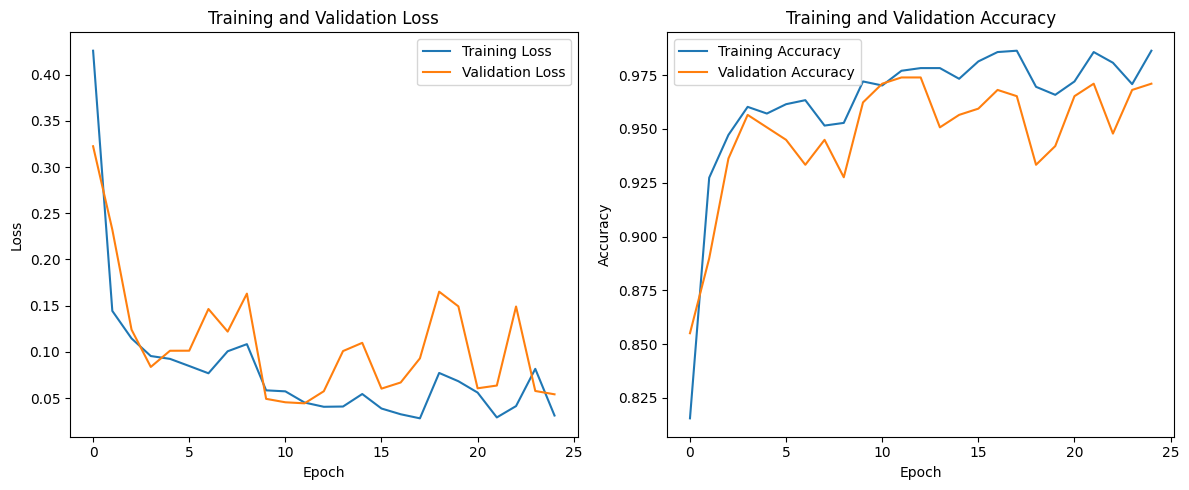

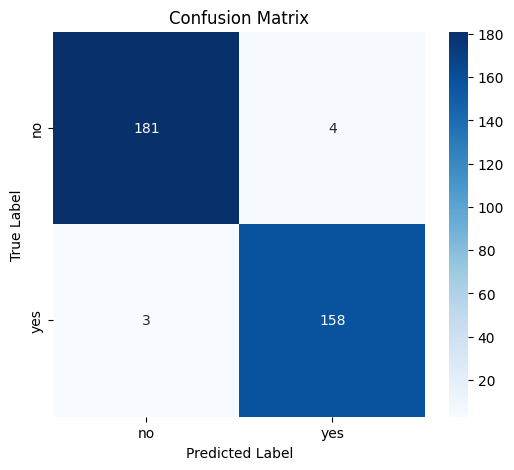

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# 1. Create a plot for the training and validation loss over epochs.
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
# 2. Add a title and labels to the loss plot.
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 3. Create a plot for the training and validation accuracy over epochs.
plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), train_accuracies, label='Training Accuracy')
plt.plot(range(num_epochs), val_accuracies, label='Validation Accuracy')
# 4. Add a title and labels to the accuracy plot.
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 5. Display both the loss and accuracy plots.
plt.tight_layout()
plt.show()

# 6. Create a heatmap for the confusion matrix using the conf_matrix variable.
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=image_dataset.classes, yticklabels=image_dataset.classes)
# 7. Add labels, title, and annotations to the confusion matrix heatmap.
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# 8. Display the confusion matrix heatmap.
plt.show()

## Summary:

### Data Analysis Key Findings

* The dataset contains images belonging to two classes: 'yes' and 'no', representing the presence or absence of a brain tumor. The exact distribution between these two classes was visualized in the plot above.
* A ResNet18 model pre-trained on ImageNet was loaded and adapted for binary classification by modifying its final layer to have 2 output features.
* The model was trained for 25 epochs using the Adam optimizer and Cross-Entropy Loss.
* During training, the model's performance was tracked on both the training and validation sets, showing the progression of loss and accuracy over epochs in the plots above.
* Upon evaluation on the test set, the model achieved a test accuracy of approximately 97.98%.
* The confusion matrix shows that the model correctly classified 181 instances of the 'no' class and 158 instances of the 'yes' class on the test set. It misclassified 4 instances of the 'no' class as 'yes' and 3 instances of the 'yes' class as 'no'.

### Insights or Next Steps

* The model shows strong performance on the test set, achieving a high accuracy of 97.98%.
* The confusion matrix indicates that the model has a low rate of misclassification for both classes.
* Further steps could involve analyzing the specific images that were misclassified (the 4 false positives and 3 false negatives) to understand potential patterns or challenges the model faced, and potentially exploring data augmentation techniques or different model architectures to further improve performance and robustness.